In [321]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "brain-tumor-dataset"

# **Import**

In [322]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & EDA**

In [323]:
df <- read.csv('/kaggle/input/brain-tumor-dataset/brain_tumor_dataset.csv')

**Data Descroption**
* **Patient ID: Unique identifier for each patient.**
* **Age: The age of the patient at the time of diagnosis.**
* **Gender: The gender of the patient (Male/Female).**
* **Tumor Type: Classification of the tumor type (e.g., Meningioma, Glioma, Pituitary Tumor).**
* **Tumor Location: The location of the tumor within the brain.**
* **MRI Images: Scans from different MRI modalities, such as T1-weighted, T2-weighted, FLAIR, etc.**
* **Clinical Notes: Any relevant clinical observations or symptoms recorded by healthcare professionals.**
* **Treatment Plan: Information on the treatment approach, including surgery, radiotherapy, chemotherapy, or a combination.**

In [324]:
str(df)

'data.frame':	1000 obs. of  6 variables:
 $ Tumor.Type : chr  "Oligodendroglioma" "Ependymoma" "Meningioma" "Ependymoma" ...
 $ Location   : chr  "Occipital Lobe" "Occipital Lobe" "Occipital Lobe" "Occipital Lobe" ...
 $ Size..cm.  : num  9.23 0.87 2.33 1.45 6.45 2.82 1.29 7.83 0.72 2.07 ...
 $ Grade      : chr  "I" "II" "II" "III" ...
 $ Patient.Age: int  48 47 12 38 35 46 71 16 38 77 ...
 $ Gender     : chr  "Female" "Male" "Female" "Female" ...


In [325]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tumor.Type*,1,1000,3.0180,1.4070024,3.000,3.02250,1.482600,1.00,5,4.00,0.002584805,-1.283854,0.04449332
Location*,2,1000,3.5120,1.7253501,3.000,3.51500,2.965200,1.00,6,5.00,-0.001569397,-1.287620,0.05456036
Size..cm.,3,1000,5.2215,2.8273180,5.265,5.22075,3.654609,0.51,10,9.49,-0.010340004,-1.233012,0.08940765
Grade*,4,1000,2.4920,1.1363218,2.500,2.49000,2.223900,1.00,4,3.00,0.003379777,-1.403278,0.03593365
Patient.Age,5,1000,43.5190,25.0058179,43.000,43.23750,31.134600,1.00,89,88.00,0.060282563,-1.182530,0.79075339
Gender*,6,1000,1.5140,0.5000541,2.000,1.51750,0.000000,1.00,2,1.00,-0.055937953,-1.998867,0.01581310


**Missing Value Check**

In [326]:
colSums(is.na(df))

Tumor.Type    Location   Size..cm.       Grade Patient.Age      Gender 
          0           0           0           0           0           0

**Duplicated Check**

In [327]:
sum(duplicated(df))

[1] 0

In [328]:
head(df)

,Tumor.Type,Location,Size..cm.,Grade,Patient.Age,Gender
,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Oligodendroglioma,Occipital Lobe,9.23,I,48,Female
2,Ependymoma,Occipital Lobe,0.87,II,47,Male
3,Meningioma,Occipital Lobe,2.33,II,12,Female
4,Ependymoma,Occipital Lobe,1.45,III,38,Female
5,Ependymoma,Brainstem,6.45,I,35,Female
6,Astrocytoma,Brainstem,2.82,III,46,Male


# **2. Data Transform for Visuaization**

In [329]:
names(df) <- c('Tumor','Location','Size_cm','Grade','Patient_Age','Gender')

In [330]:
head(df)

,Tumor,Location,Size_cm,Grade,Patient_Age,Gender
,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Oligodendroglioma,Occipital Lobe,9.23,I,48,Female
2,Ependymoma,Occipital Lobe,0.87,II,47,Male
3,Meningioma,Occipital Lobe,2.33,II,12,Female
4,Ependymoma,Occipital Lobe,1.45,III,38,Female
5,Ependymoma,Brainstem,6.45,I,35,Female
6,Astrocytoma,Brainstem,2.82,III,46,Male


# **3. Data Visualization**

In [331]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

## **Histogram & Boxplot**

In [332]:
a <- ggplot(df) + geom_histogram(aes(x= Size_cm), fill = 'skyblue', col = 'black', bins = 30, position = 'dodge') +
            labs(title = 'Size_cm Histogram') + 
            theme_bw() +
            theme(
            legend.position = 'none',
            axis.title = element_text(size=20),
            axis.text.x = element_text(size = 20, hjust=1),
            axis.text.y = element_text(size = 20),
            title = element_text(size=15)
            )

b <- ggplot(df) + geom_boxplot(aes(x= Size_cm), fill = 'blue') + 
            labs(title = 'Size_cm boxplot') + 
            theme_bw() +
            theme(
            legend.position = 'none',
            axis.title = element_text(size=20),
            axis.text.x = element_text(size = 20, hjust=1),
            axis.text.y = element_text(size = 20),
            title = element_text(size=15)
            )

c <- ggplot(df) + geom_histogram(aes(x=Patient_Age), fill = 'skyblue', col = 'black', bins=30 , position = 'dodge') +
            labs(title = 'Patient_Age Histogram')+
            theme_bw() +
            theme(
            legend.position = 'none',
            axis.title = element_text(size=20),
            axis.text.x = element_text(size = 20, hjust=1),
            axis.text.y = element_text(size = 20),
            title = element_text(size=15)
            )

d <- ggplot(df) + geom_boxplot(aes(x= Patient_Age), fill = 'blue') + 
            labs(title = 'Patient_Age boxplot') + 
            theme_bw() +
            theme(
            legend.position = 'none',
            axis.title = element_text(size=20),
            axis.text.x = element_text(size = 20, hjust=1),
            axis.text.y = element_text(size = 20),
            title = element_text(size=15)
            )

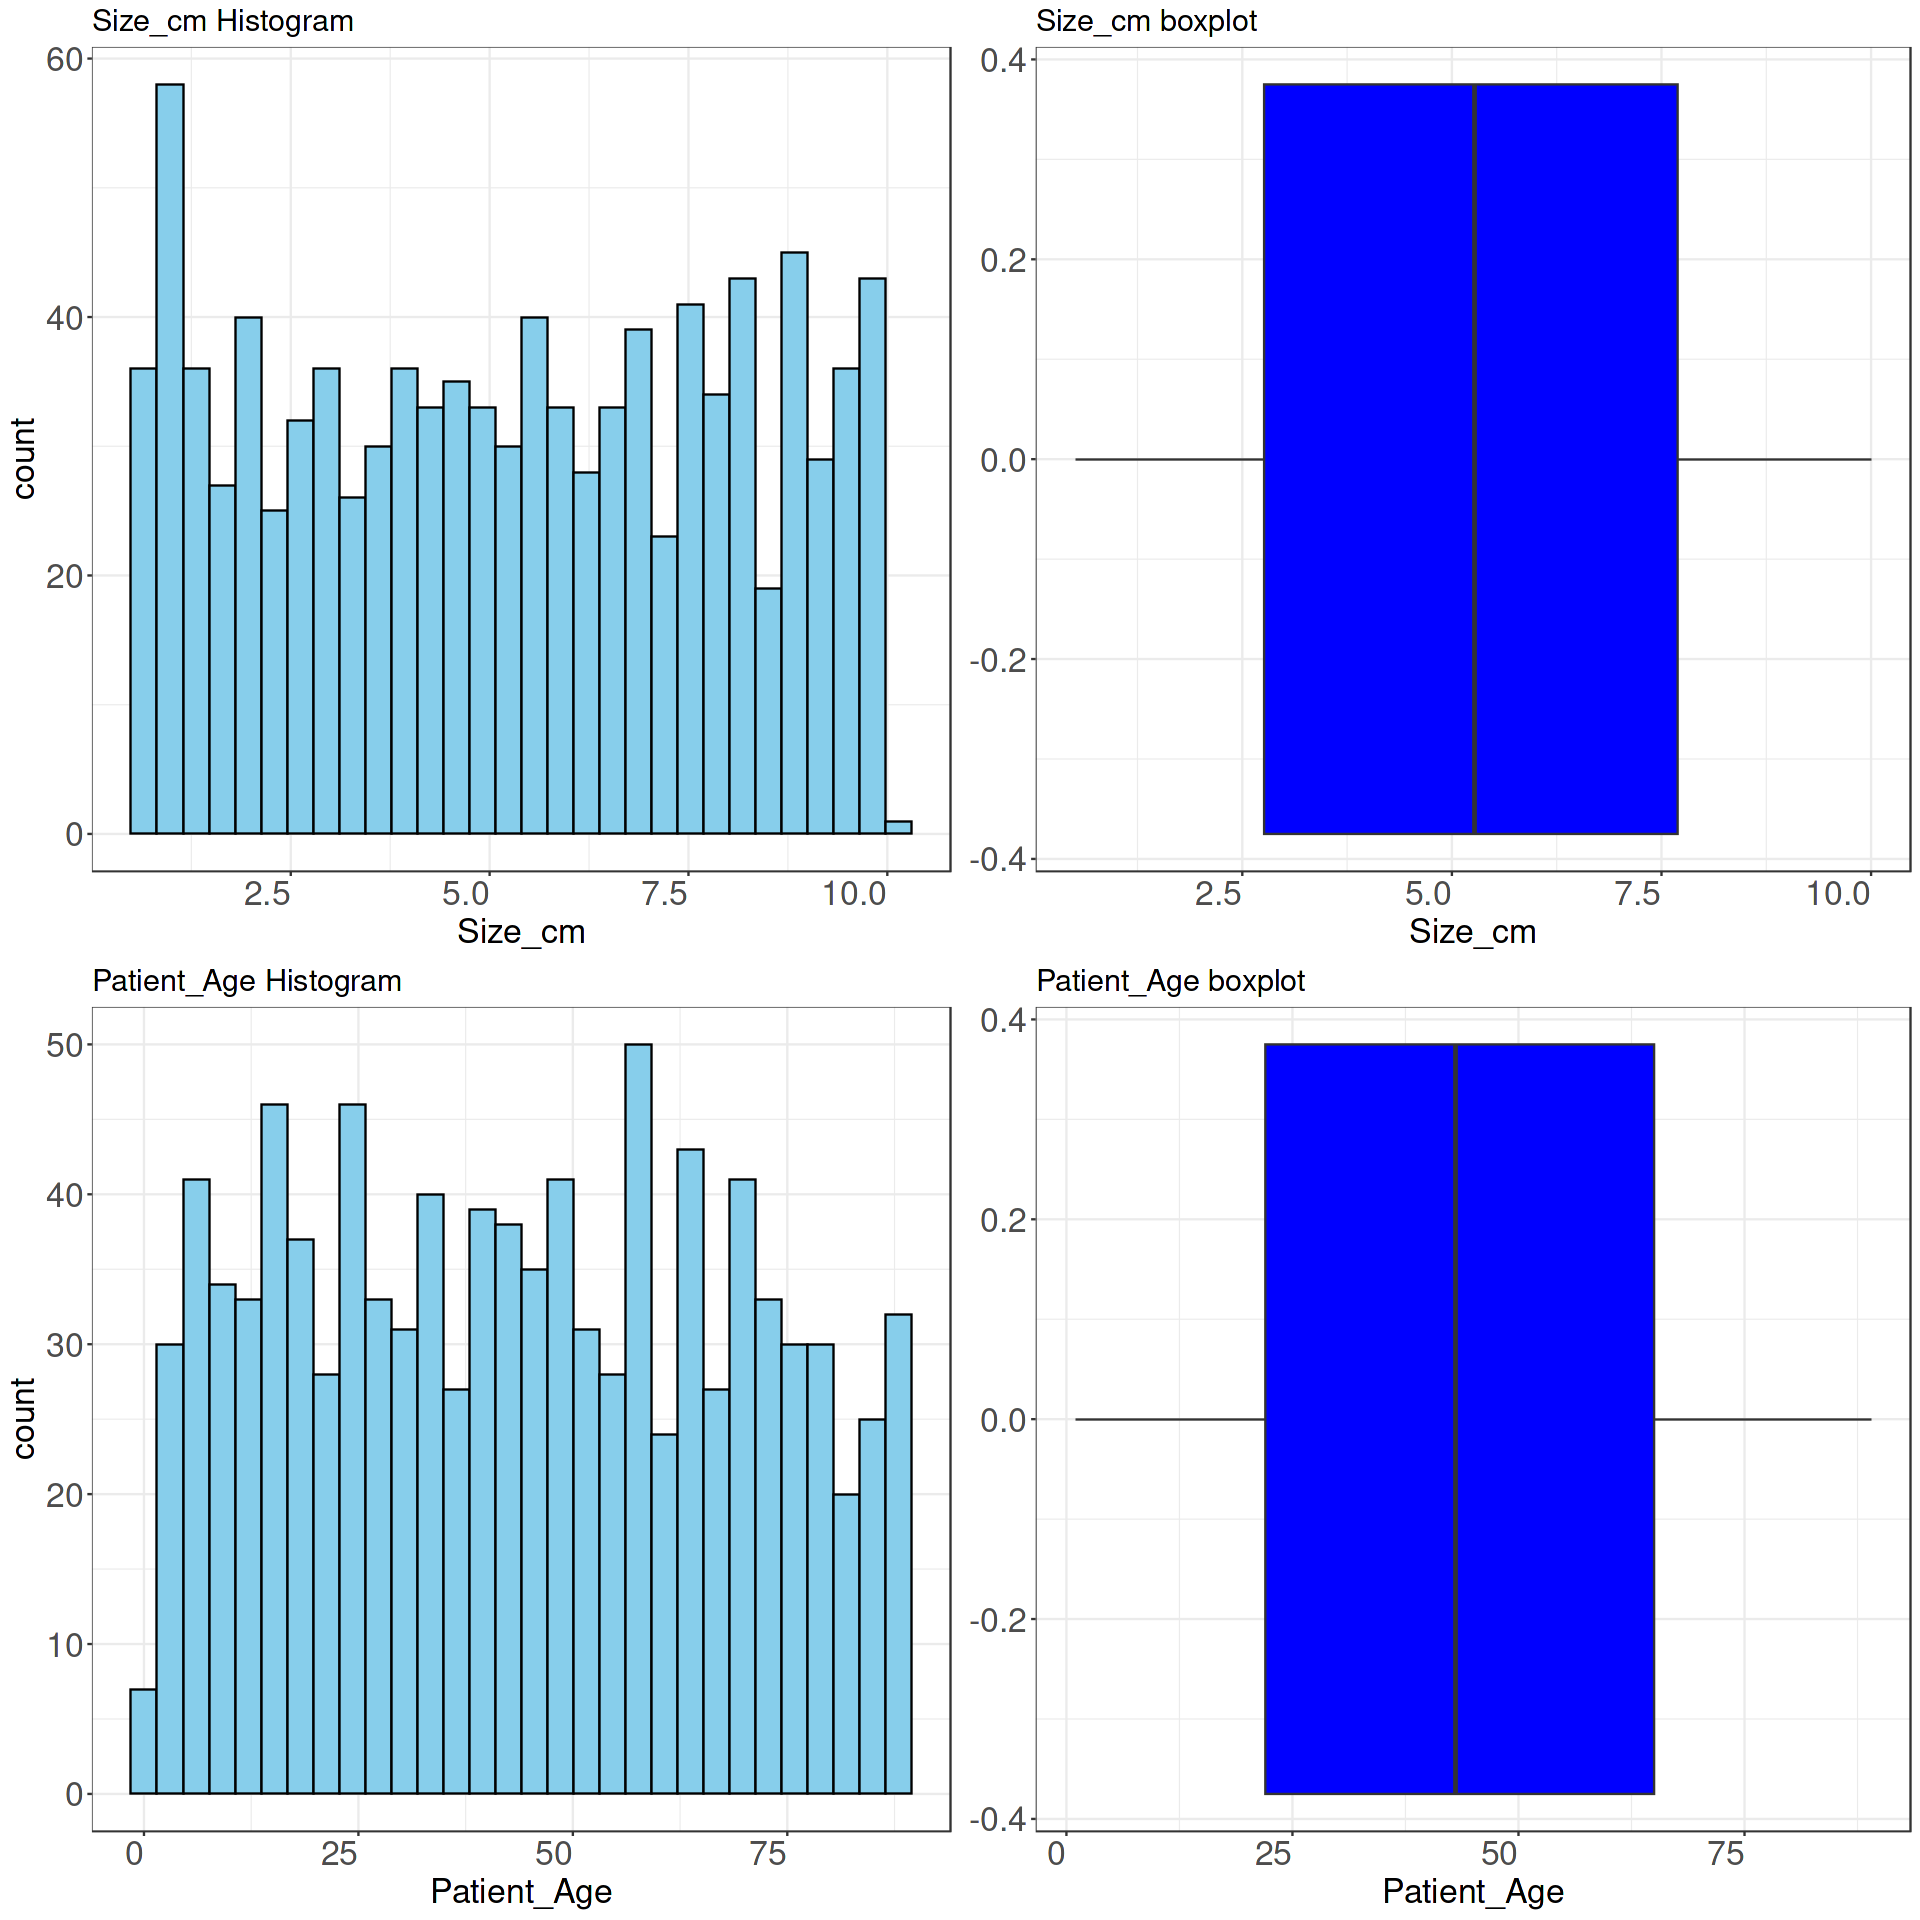

In [333]:
grid.arrange(a,b,c,d, ncol = 2)

## **CountPlot**

In [334]:
a <- ggplot(df) + geom_bar(aes(x=Tumor, fill= Tumor), position = 'dodge') +
        theme_bw() +
        ggtitle('Tumor Countplot') + 
        theme(
        legend.position = 'none',
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 20, hjust=1, angle = 45),
        axis.text.y = element_text(size = 20),
        title = element_text(size=15)
        )

b <- ggplot(df) + geom_bar(aes(x=Location, fill= Location ), position = 'dodge') +
        theme_bw() +
        ggtitle('Location Countplot') + 
        theme(
        legend.position = 'none',
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 20, hjust=1, angle = 45),
        axis.text.y = element_text(size = 20),
        title = element_text(size=15)
        )

c <- ggplot(df) + geom_bar(aes(x=Grade, fill= Grade),position = 'dodge') +
        theme_bw() +
        ggtitle('Grade Countplot') + 
        theme(
        legend.position = 'none',
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 20, hjust=1),
        axis.text.y = element_text(size = 20),
        title = element_text(size=15)
        )

d <- ggplot(df) + geom_bar(aes(x=Gender, fill= Gender),position = 'dodge') +
        theme_bw() +
        ggtitle('Gender Countplot') + 
        theme(
        legend.position = 'none',
        axis.title = element_text(size=20),
        axis.text.x = element_text(size = 20, hjust=1),
        axis.text.y = element_text(size = 20),
        title = element_text(size=15)
        )

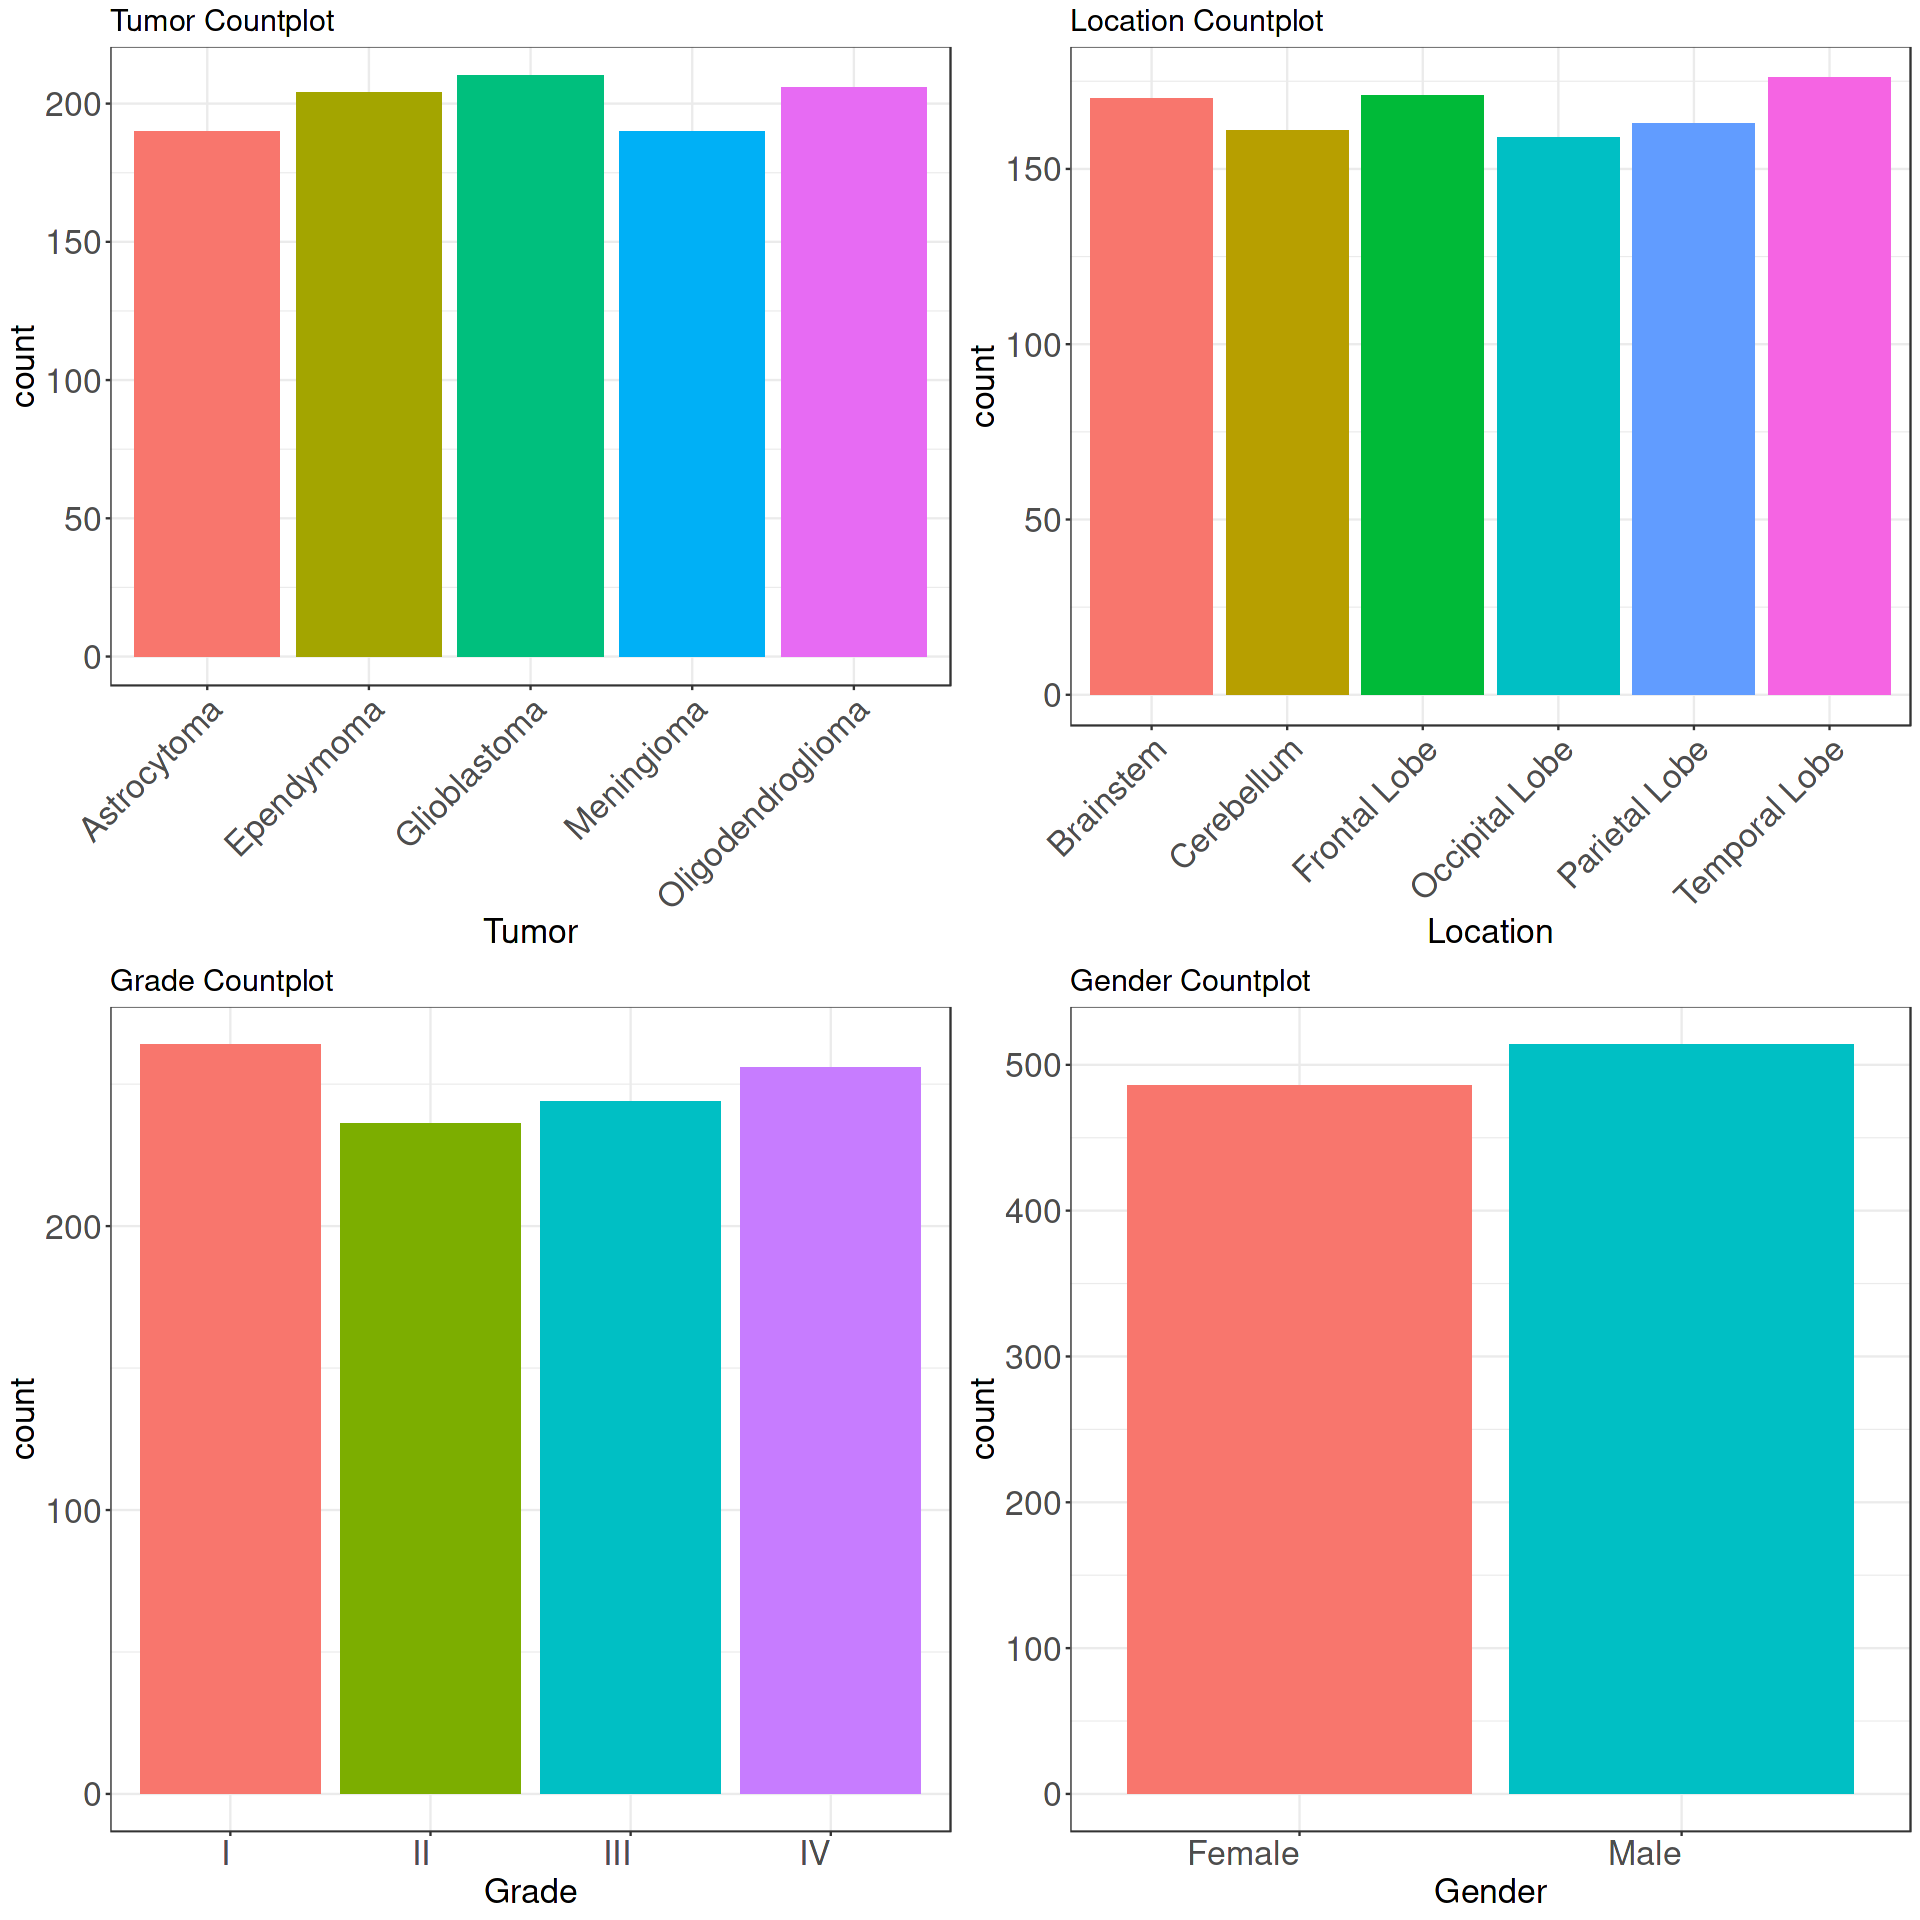

In [335]:
grid.arrange(a,b,c,d, ncol = 2)

## **The Most common tumor by gender**

In [336]:
common_tumor <- df %>%
            group_by(Gender) %>%
            count(Tumor)

In [337]:
common_tumor

Gender,Tumor,n
<chr>,<chr>,<int>
Female,Astrocytoma,93
Female,Ependymoma,93
Female,Glioblastoma,104
Female,Meningioma,99
Female,Oligodendroglioma,97
Male,Astrocytoma,97
Male,Ependymoma,111
Male,Glioblastoma,106
Male,Meningioma,91


In [338]:
options(repr.plot.width = 16.0, repr.plot.height = 12.0)

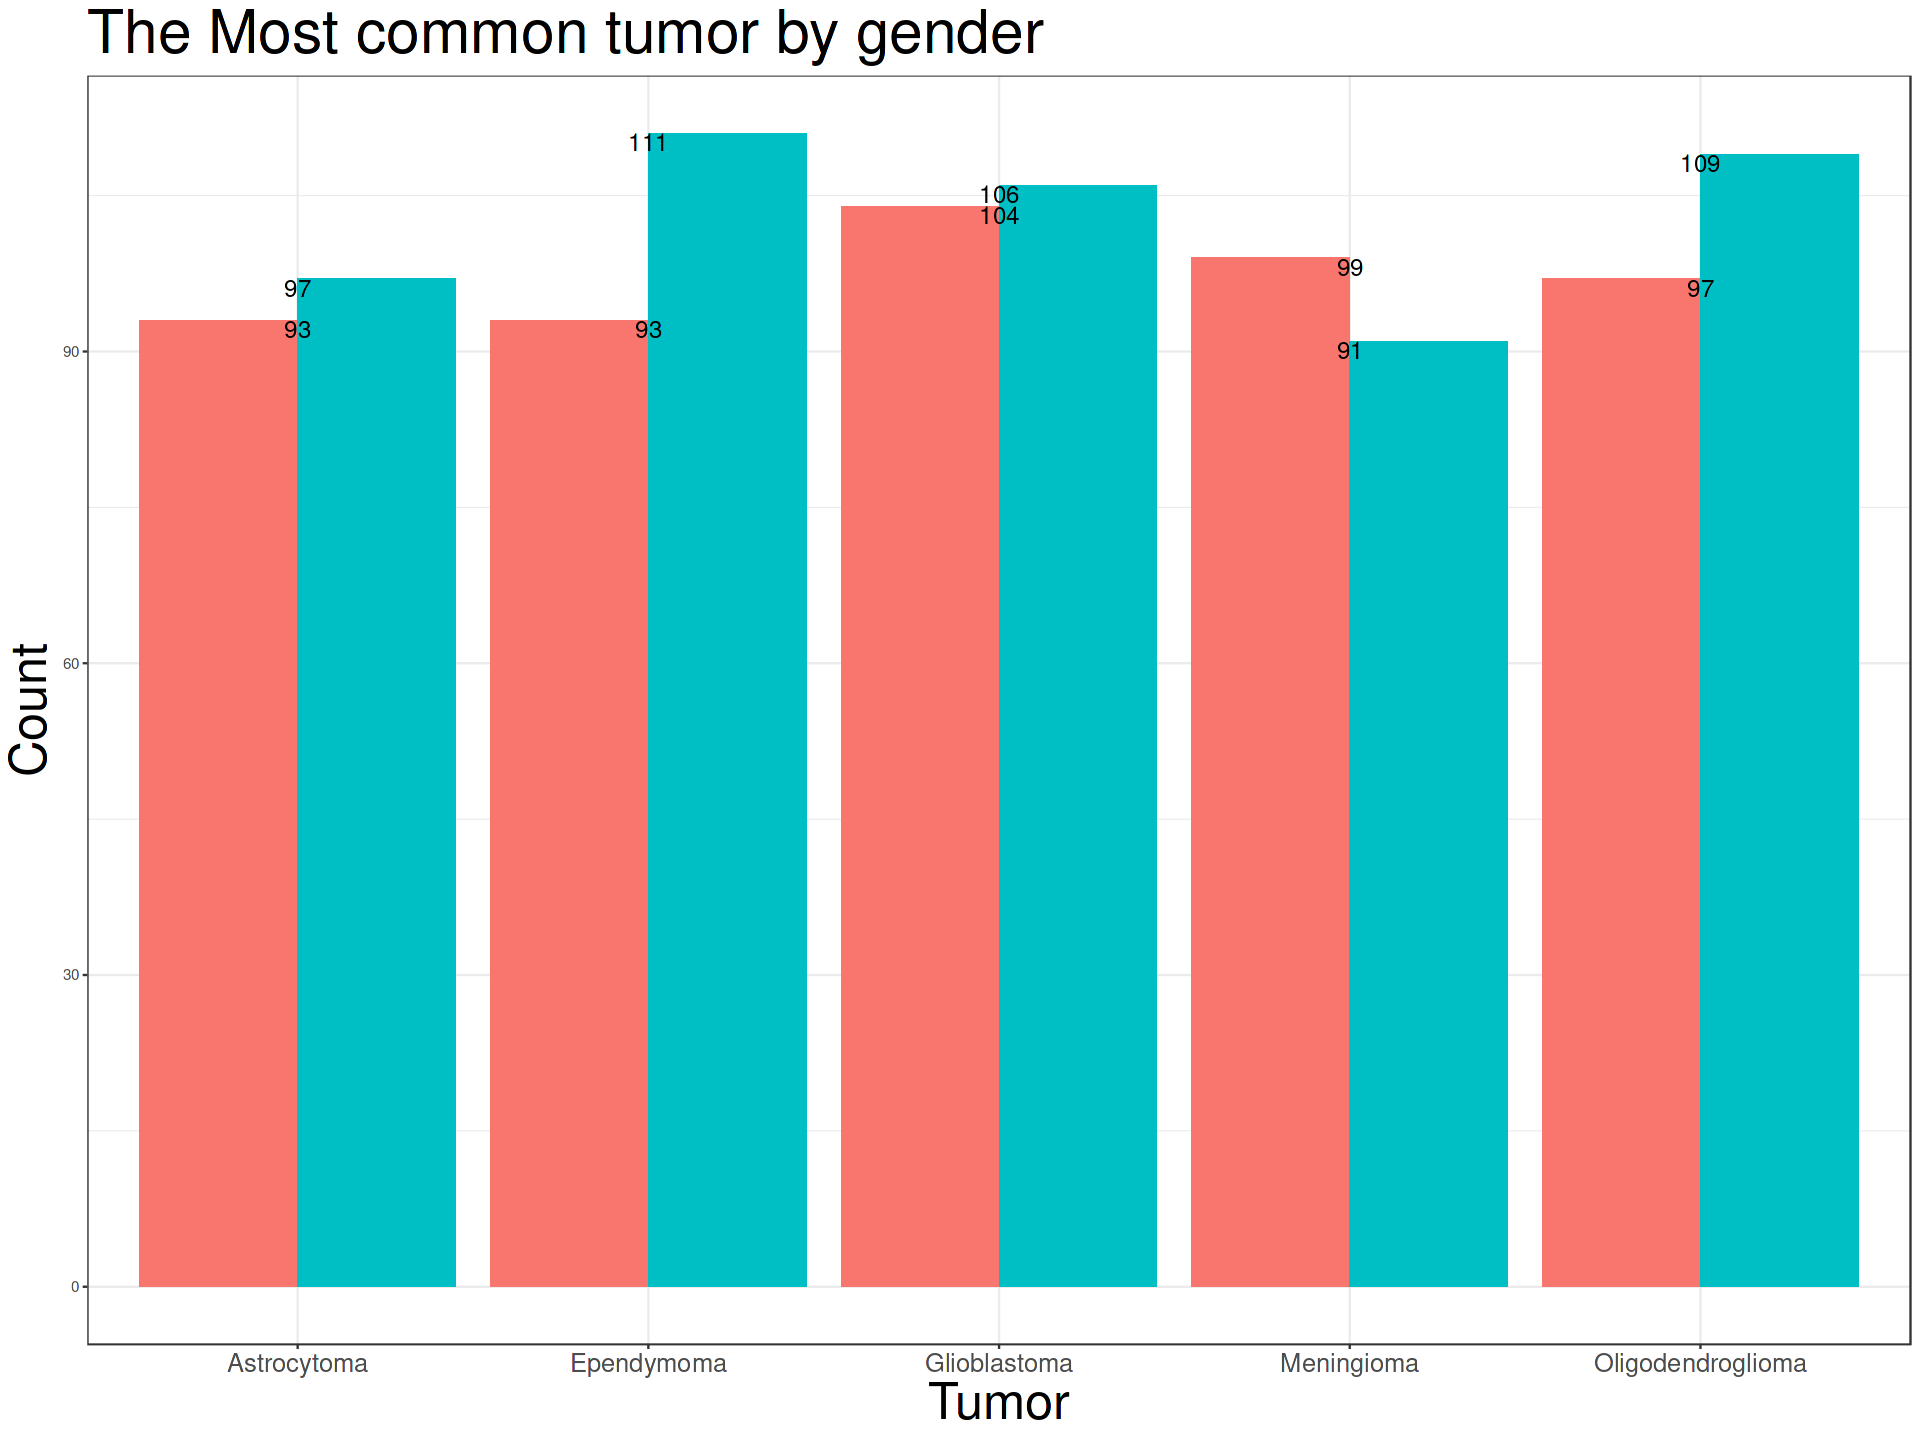

In [339]:
ggplot(common_tumor) +
                geom_col(aes(x=Tumor , y = n , fill = Gender), position = 'dodge') +
                geom_text(aes(x=Tumor , y = n, label= n), vjust=1, size = 5) +
                ggtitle('The Most common tumor by gender') + 
                ylab('Count')+
                theme_bw() +
                theme(legend.position = 'none',
                axis.title = element_text(size=30),
                axis.text.x = element_text(size = 15),
                title = element_text(size=30)
                )

## **Average Size by Tumor**

In [340]:
tumor_size <- df %>% 
                group_by(Tumor) %>% 
                summarize(Avg_size = mean(Size_cm,na.rm=T))

In [341]:
tumor_size

Tumor,Avg_size
<chr>,<dbl>
Astrocytoma,5.150158
Ependymoma,5.108382
Glioblastoma,5.365857
Meningioma,5.387263
Oligodendroglioma,5.099272


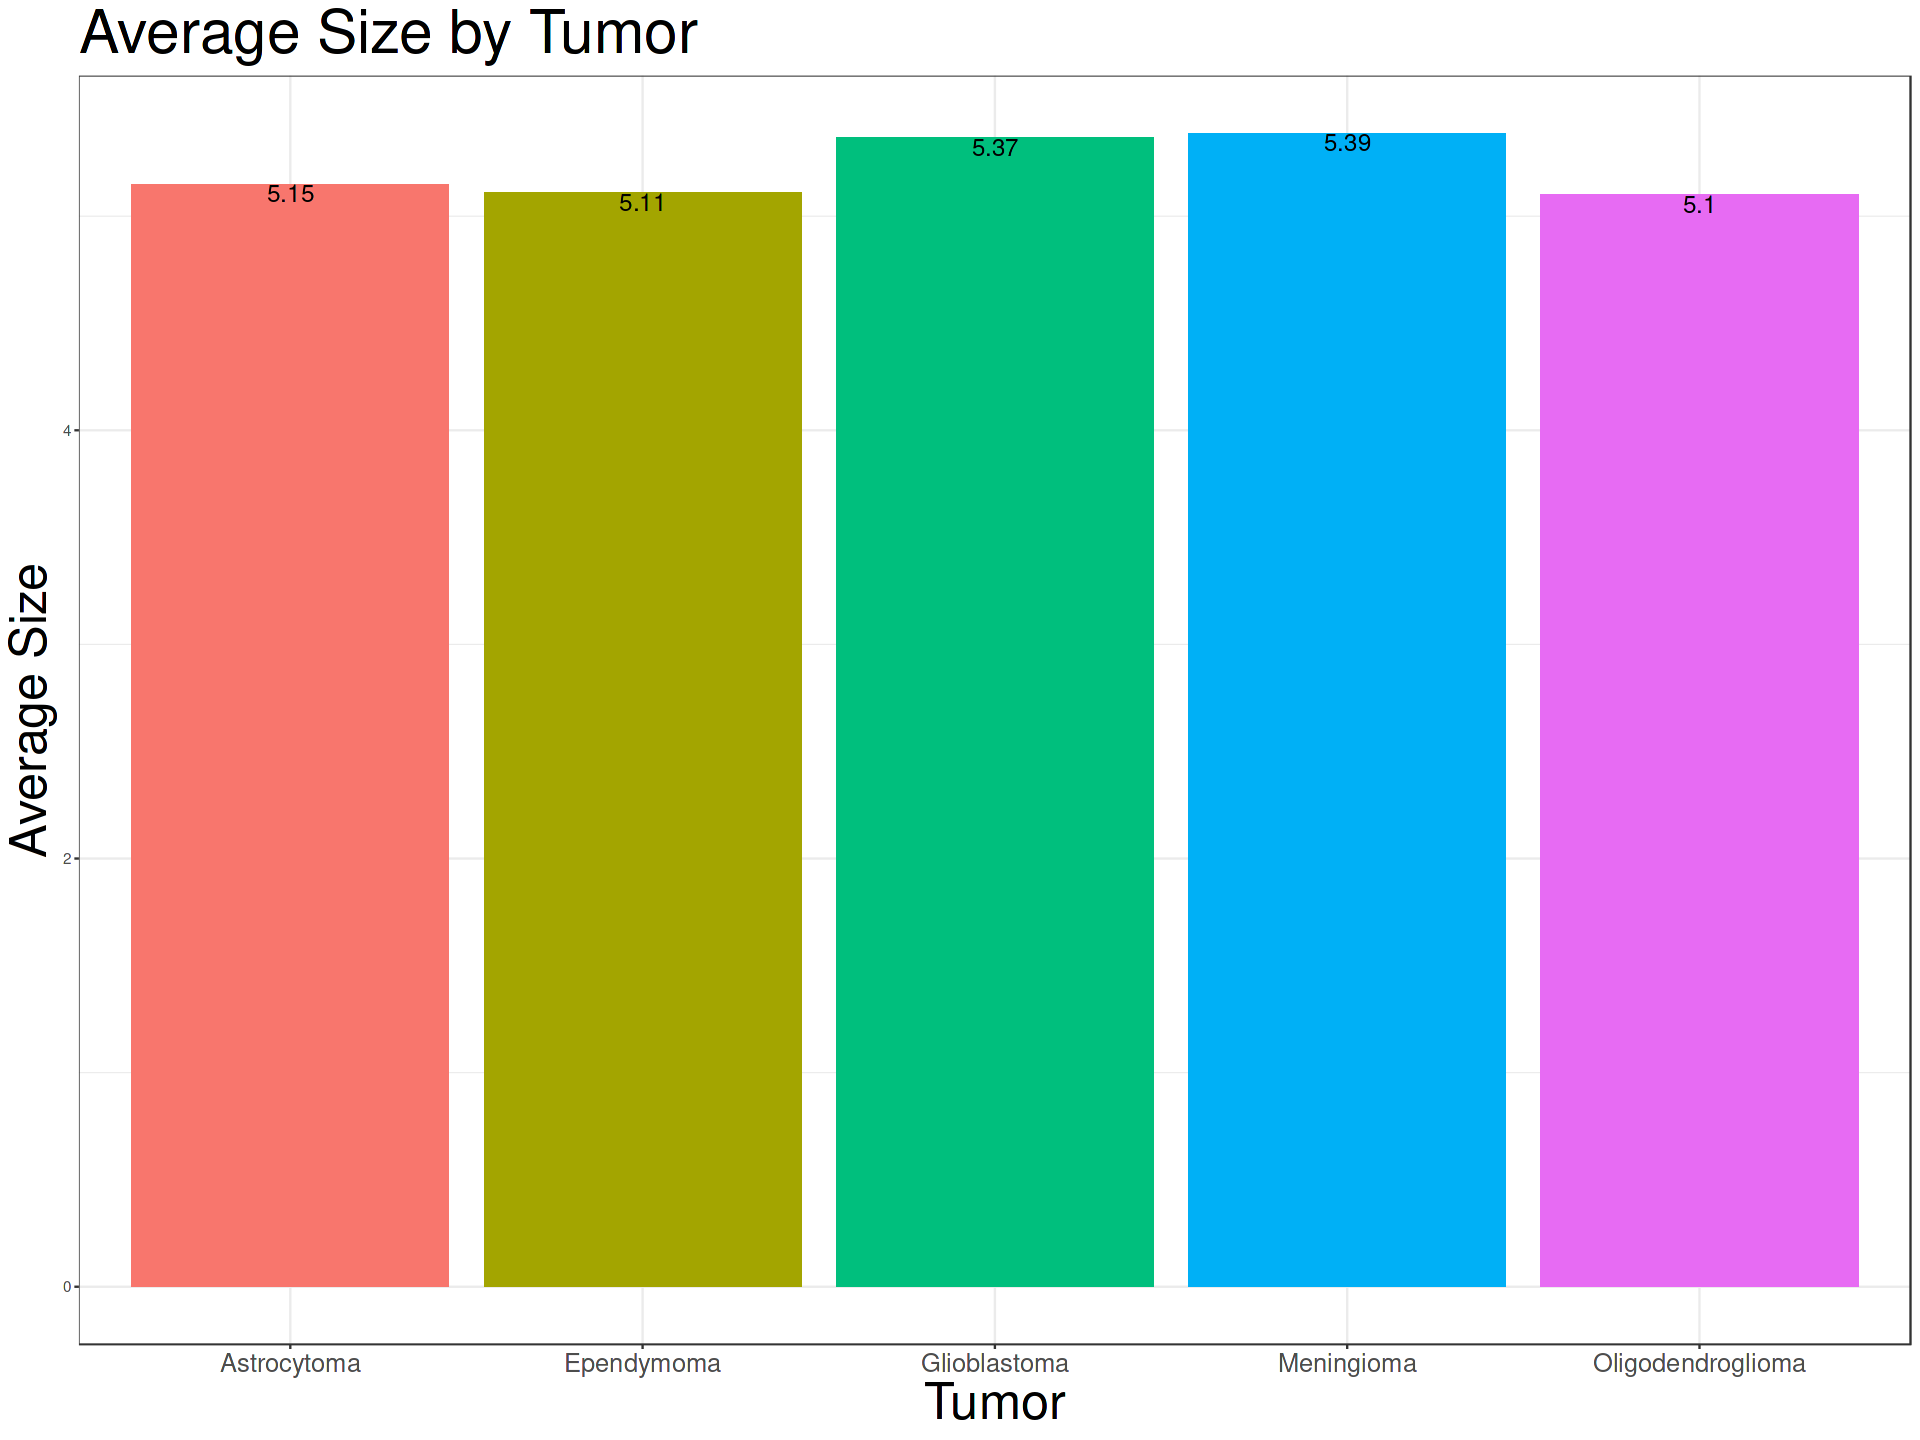

In [342]:
ggplot(tumor_size) +
                geom_col(aes(x=Tumor , y = Avg_size , fill = Tumor), position = 'dodge') +
                geom_text(aes(x=Tumor , y = Avg_size, label= round(Avg_size,2)), vjust=1, size = 5) +
                ggtitle('Average Size by Tumor') + 
                ylab('Average Size')+
                theme_bw() +
                theme(legend.position = 'none',
                axis.title = element_text(size=30),
                axis.text.x = element_text(size = 15),
                title = element_text(size=30)
                )

## **4. Modeling**

In [364]:
library(randomForest)
library(Metrics)
library(caret)
library(mltools)
library(data.table)
library(class)


## **Preprocessing**

In [344]:
#column type conversion
#Character -> Factor

for(i in 1:ncol(df))
{
    if(is.character(df[,i]) == T)
        df[,i] <- as.factor(df[,i])
}

In [345]:
df <- df[,-2]

In [346]:
df$Grade <- ifelse(df$Grade == 'I',1,
                  ifelse(df$Grade == 'II',2,
                        ifelse(df$Grade == 'III',3,
                              ifelse(df$Grade == 'IV',4,0))))

In [347]:
df$Gender <- ifelse(df$Gender == 'Male',0,1)

In [348]:
head(df)

,Tumor,Size_cm,Grade,Patient_Age,Gender
,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,Oligodendroglioma,9.23,1,48,1
2,Ependymoma,0.87,2,47,0
3,Meningioma,2.33,2,12,1
4,Ependymoma,1.45,3,38,1
5,Ependymoma,6.45,1,35,1
6,Astrocytoma,2.82,3,46,0


## **Train Test Split**

In [349]:
idx <- sample(1:nrow(df), 0.7 * nrow(df))
train <- df[idx,]
test <- df[-idx,]

## **RandomForest Model**

In [350]:
model_rf <- randomForest(Tumor~., train, ntree = 300, mtry = 3, importance = T)

In [351]:
model_rf


Call:
 randomForest(formula = Tumor ~ ., data = train, ntree = 300,      mtry = 3, importance = T) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 77.14%
Confusion matrix:
                  Astrocytoma Ependymoma Glioblastoma Meningioma
Astrocytoma                30         29           31         28
Ependymoma                 21         37           28         30
Glioblastoma               33         23           35         16
Meningioma                 28         34           24         22
Oligodendroglioma          22         21           41         22
                  Oligodendroglioma class.error
Astrocytoma                      23   0.7872340
Ependymoma                       24   0.7357143
Glioblastoma                     38   0.7586207
Meningioma                       24   0.8333333
Oligodendroglioma                36   0.7464789

In [352]:
pred_rf <- predict(model_rf,test)

In [353]:
cm_rf <- confusionMatrix(pred_rf, test$Tumor)
cm_rf

Confusion Matrix and Statistics

                   Reference
Prediction          Astrocytoma Ependymoma Glioblastoma Meningioma
  Astrocytoma                14         11           14         19
  Ependymoma                  6         12           16         11
  Glioblastoma                7         12           16         15
  Meningioma                 11         12            5          4
  Oligodendroglioma          11         17           14          9
                   Reference
Prediction          Oligodendroglioma
  Astrocytoma                      13
  Ependymoma                       13
  Glioblastoma                      6
  Meningioma                       18
  Oligodendroglioma                14

Overall Statistics
                                          
               Accuracy : 0.2             
                 95% CI : (0.1562, 0.2498)
    No Information Rate : 0.2167          
    P-Value [Acc > NIR] : 0.7780          
                                          
 